### Бинарный поиск

In [38]:
from IPython.display import Image

In [5]:
class BinarySearch():

  def search_iterative(self, list, item):

    low = 0
    high = len(list) - 1


    while low <= high:

      mid = (low + high) // 2
      guess = list[mid]

      if guess == item:
        return mid

      if guess > item:
        high = mid - 1

      else:
        low = mid + 1


    return None

  def search_recursive(self, list, low, high, item):
  
    if high >= low:

        mid = (high + low) // 2
        guess = list[mid]

      
        if guess == item:
            return mid


        elif guess > item:
            return self.search_recursive(list, low, mid - 1, item)


        else:
            return self.search_recursive(list, mid + 1, high, item)

    else:
  
        return None

if __name__ == "__main__":

  bs = BinarySearch()
  my_list = [1, 3, 5, 7, 9]

  print(bs.search_iterative(my_list, 7))

  print(bs.search_iterative(my_list, 9))

3
4


### Рекурсия

In [13]:
# ФАКТОРИАЛ
def fact(x):
    if x == 1:
        return 1
    else:
        return x * fact(x-1)

print(fact(5))

120


In [9]:
# СУММА ЧИСЕЛ
def sum_array(arr):
    if not arr:
        return 0
    return arr[0] + sum_array(arr[1:])

print(sum_array([1,2,3,4]))

10


### Быстрая сортировка

In [12]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 3, 20, 18, 1, 36, 40, 0, 4]))

[0, 1, 2, 3, 4, 5, 10, 18, 20, 36, 40]


### Хеширование, хеш-функции

Допустим, у нас есть огромный набор данных : продукт-цена. Чтобы при запросе быстро получать цену на продукт, нужно данные эффективно хранить. Помогает хэш-функция. Она помещает цену продукта в такую ячейку памяти, адрес которой совпадает с вычисленным для названия продукта ценой. То есть для "авокадо" хэш-функция вычислила 67, допустим. Помещаем в 67-ую ячейку. И при запросе цены на авокадо мы уже знаем где хранится ответ, не нужно применят поиск, сортировку и т.п. Сложность О(1) - самый эффективный доступ к данным. В частности, словари dict так и работают в Python.

In [16]:
# ЧАСТНЫЙ СЛУЧАЙ - КЭШИРОВАНИЕ ВЕБ-САЙТОВ ДЛЯ БОЛЕЕ БЫСТРОГО ДОСТУПА К НИМ
cache = {}
def get_page(url) :
    if cache.get(url):
        return cache[url] # Возвращаются кэшированные данные
    else:
        data = get_data_from_server(url)
        cache[url] = data # Данные сначала сохраняются в кэше
        return data

### Поиск в ширину

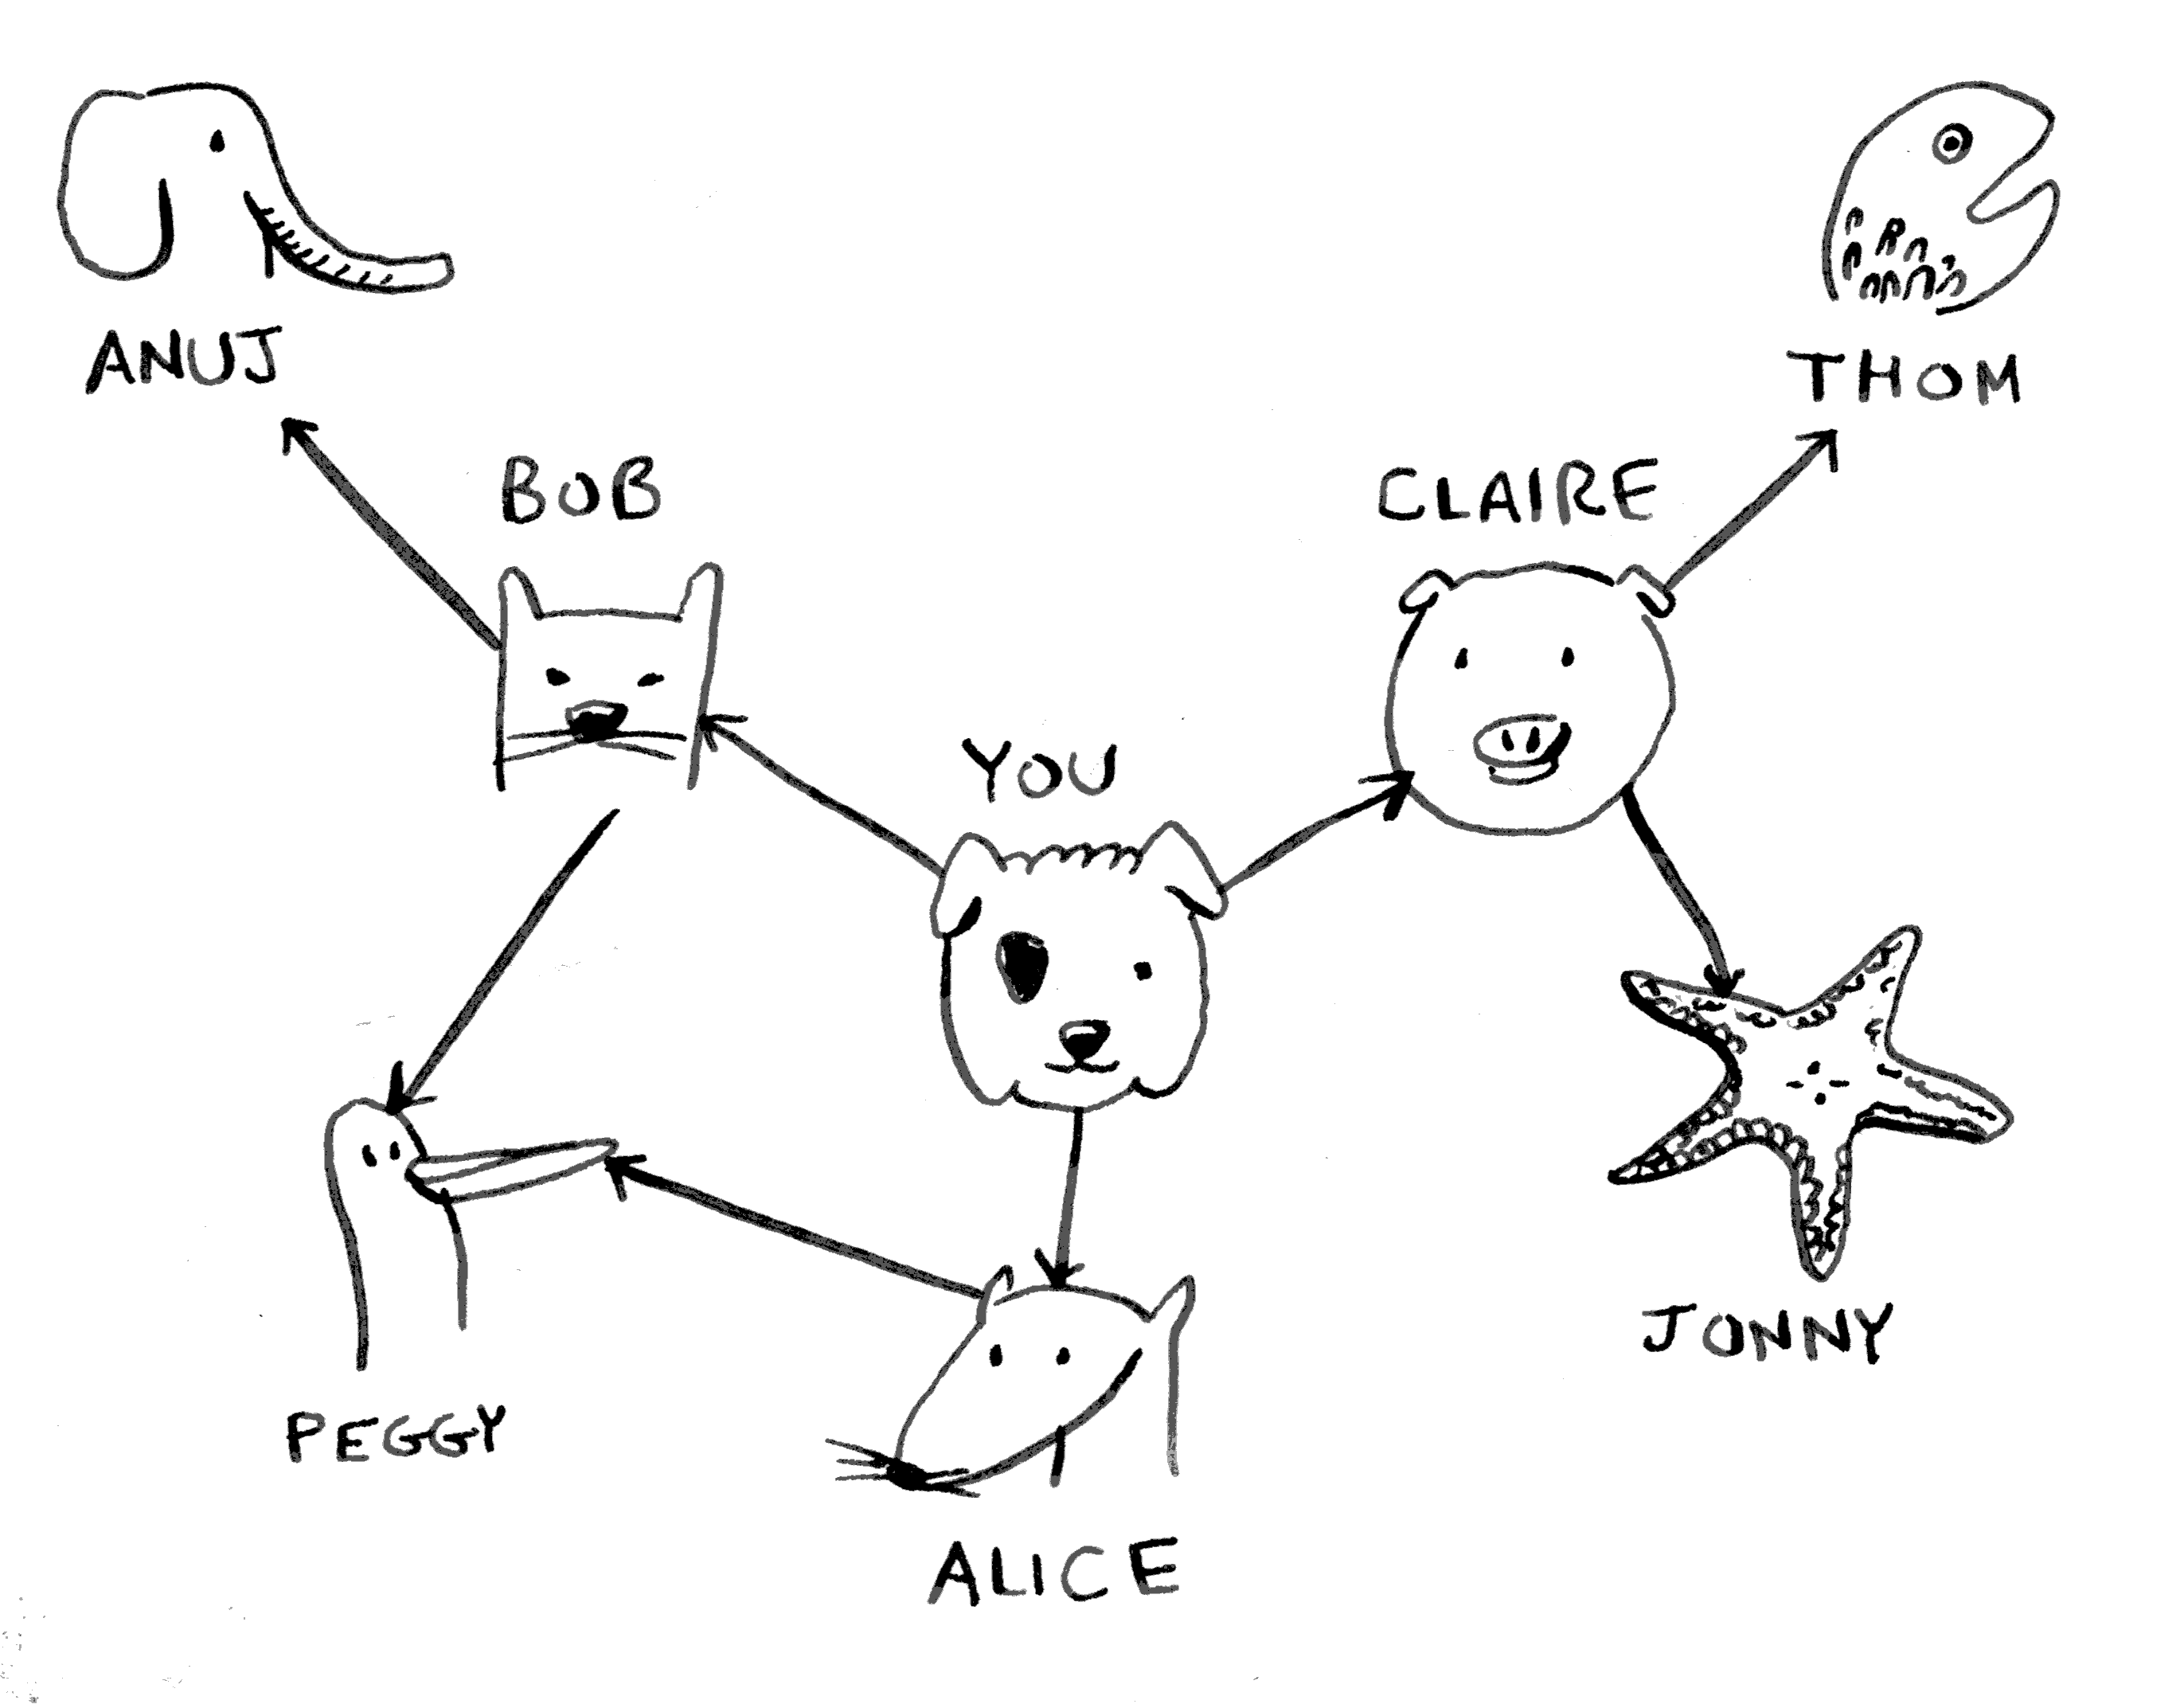

In [36]:
Image("friends_of_friends.png", width=400, height=400)

Допустим, мы ищем продавца манго. Того, у кого последняя буква имени - m, допустим такое условие. Сначала проверяются ближайшие друзья, по ходу проверки мы записываем в очередь поиска список его друзей, до них мы дойдем когда проверим близлежащих друзей. И так далее, пока не пройдем все круги друзей. Это и есть поиск в ширину. В данном примере/коде используется допущение, что граф однонаправленный, чтобы не было зацикливания.

In [37]:
from collections import deque

def person_is_seller(name):
      return name[-1] == 'm'

graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

def search(name):
    search_queue = deque()
    search_queue += graph[name]
    # This is how you keep track of which people you've searched before.
    searched = set()
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person_is_seller(person):
                print(person + " is a mango seller!")
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.add(person)
    return False

search("you")

thom is a mango seller!


True

### Алгоритм Дейкстры

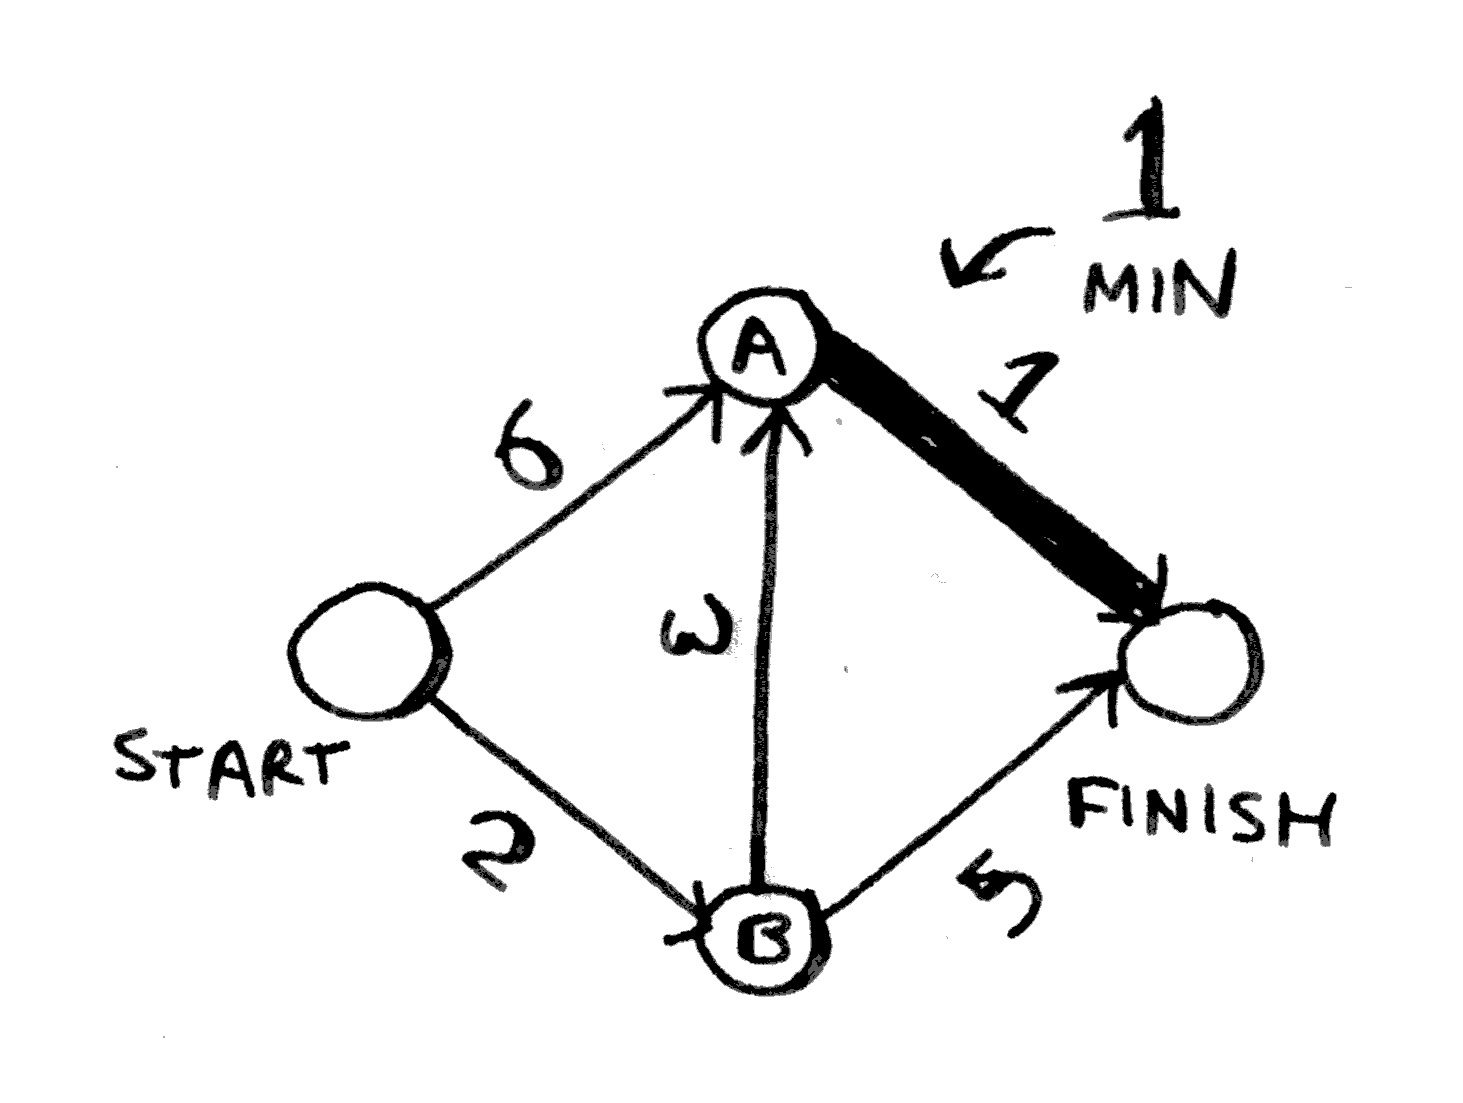

In [32]:
Image("1_.png", width=300, height=300)

Посмотрим, как этот алгоритм работает с графом.
Каждому ребру назначается время перемещения в минутах. Алгоритм
Дейкстры используется для поиска пути от начальной точки к конечной
за кратчайшее возможное время.

1. Найти узел с наименьшей стоимостью (то есть узел, до которого можно
добраться за минимальное время).
2. Проверить, существует ли более дешевый путь к соседям этого узла,
и если существует, обновить их стоимости.
3. Повторять, пока это не будет сделано для всех узлов графа.
4. Вычислить итоговый путь.

In [33]:
# the graph
graph = {}
graph["start"] = {}
graph["start"]["a"] = 6
graph["start"]["b"] = 2

graph["a"] = {}
graph["a"]["fin"] = 1

graph["b"] = {}
graph["b"]["a"] = 3
graph["b"]["fin"] = 5

graph["fin"] = {}

# the costs table
infinity = float("inf")
costs = {}
costs["a"] = 6
costs["b"] = 2
costs["fin"] = infinity

# the parents table
parents = {}
parents["a"] = "start"
parents["b"] = "start"
parents["fin"] = None

processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

print("Cost from the start to each node:")
print(costs)

Cost from the start to each node:
{'a': 5, 'b': 2, 'fin': 6}


### Жадные алгоритмы

- Жадные алгоритмы стремятся к локальной оптимизации в расчете на то,
что в итоге будет достигнут глобальный оптимум.
- У NР-полных задач не существует известных быстрых решений.
- Если у вас имеется NР-полная задача, лучше всего воспользоваться приближенным алгоритмом.
- Жадные алгоритмы легко реализуются и быстро выполняются, поэтому
из них получаются хорошие приближенные алгоритмы.

Вы открываете собственную авторскую программу на радио и хотите, чтобы вас слушали во всех
50 штатах. Нужно решить, на каких радиостанциях должна транслироваться ваша передача. Каждая станция стоит денег, поэтому количество станций необходимо свести к минимуму. Имеется список станций .
Каждая станция покрывает определенный набор штатов, эти наборы перекрываются.
Как найти минимальный набор станций, который бы покрывал все 50 штатов? Вроде бы простая задача, верно? Оказывается , она чрезвычайно сложна. При переборе всех вариантов станций задача становится вычислительно неразрешимой (2 в степени 50).

На помощь приходят жадные алгоритмы! Вот как выглядит жадный алгоритм, который выдает результат, достаточно близкий к оптимуму:
1. Выбрать станцию, покрывающую наибольшее количество штатов, еще
не входящих в покрытие. Если станция будет покрывать некоторые
штаты , уже входящие в покрытие, это нормально.
2. Повторять, пока остаются штаты, не входящие в покрытие.
Этот алгоритм является приближенным. Когда вычисление точного решения занимает слишком много времени, применяется приближенный алгоритм. Эффективность приближенного алгоритма оценивается по:
- быстроте;
- близости полученного решения к оптимальному.

In [21]:
# You pass an array in, and it gets converted to a set.
states_needed = set(["mt", "wa", "or", "id", "nv", "ut", "ca", "az"])

stations = {}
stations["kone"] = set(["id", "nv", "ut"])
stations["ktwo"] = set(["wa", "id", "mt"])
stations["kthree"] = set(["or", "nv", "ca"])
stations["kfour"] = set(["nv", "ut"])
stations["kfive"] = set(["ca", "az"])

final_stations = set()

while states_needed:
    best_station = None
    states_covered = set()
    for station, states_for_station in stations.items():
        covered = states_needed & states_for_station
        if len(covered) > len(states_covered):
            best_station = station
            states_covered = covered

    states_needed -= states_covered
    final_stations.add(best_station)

print(final_stations)

{'kfive', 'kone', 'kthree', 'ktwo'}


### Динамическое программирование

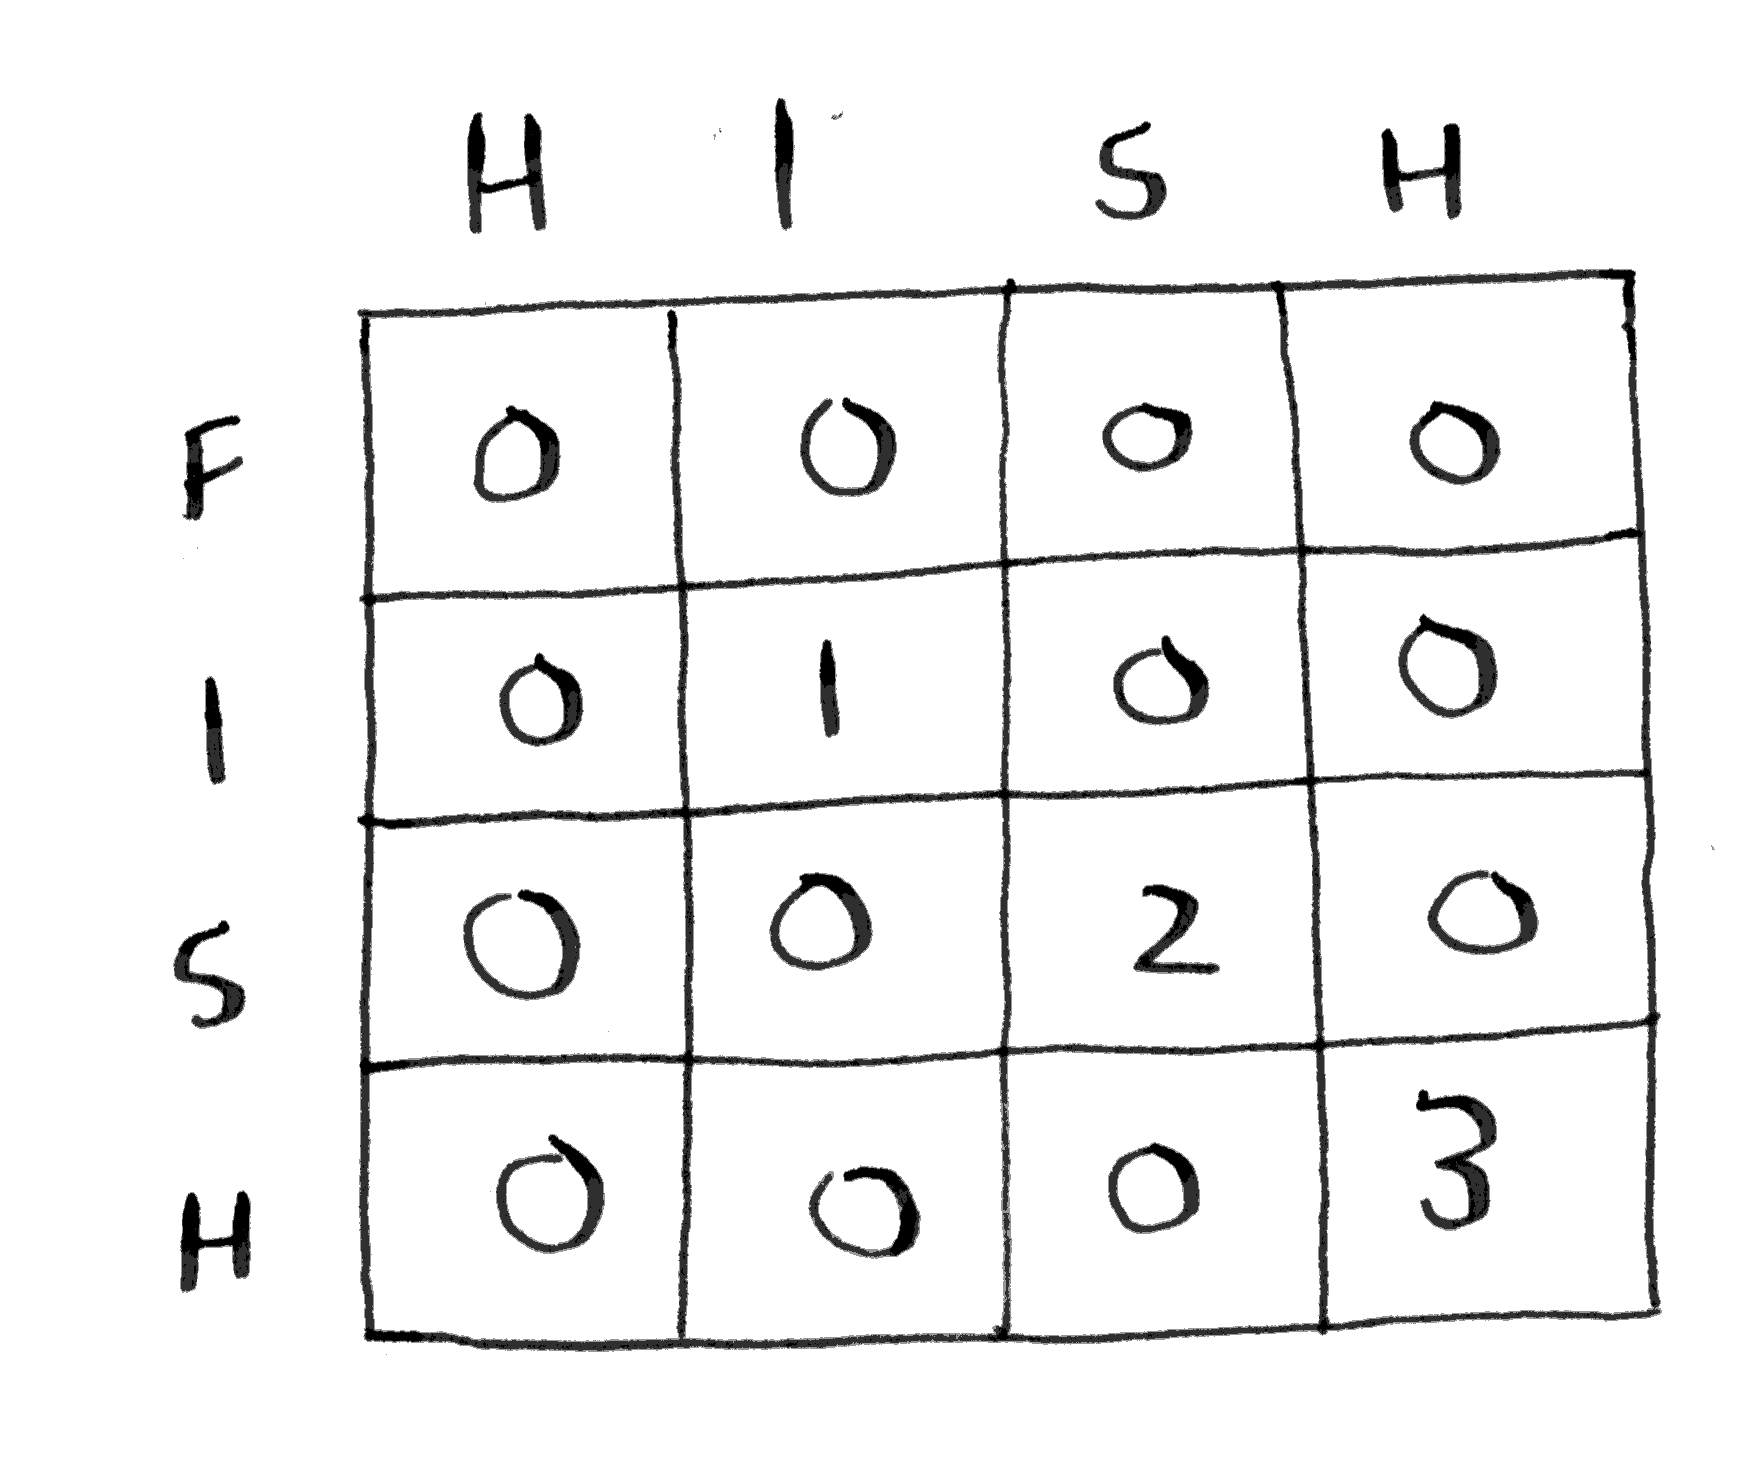

In [62]:
Image("2_.png", width=300, height=300)

Допустим, надо найти размер самой длинной подстроки, одинаковую для двух слов. Если решать методом прямого перебора, потребуется чтобы всевозможные последовательные буквы первого слова пробежали по второму слову, ища себе соответствие. Задача имеет вычислительную сложность порядка О(2 в степени n * m, где n,m - длины слов). Но есть изящный легкий путь сложности двухуровневого цикла О(n * m):

In [68]:
word_a = 'ывавапрккыввасявпаире' # здесь общая подстрока - вася
word_b = 'мкцвасяйфячыцвмвп'

In [69]:
cell = [[0 for j in word_b] for i in word_a]

for i in range(len(word_a)):
    for j in range(len(word_b)):
        if word_a[i] == word_b[j]:
            cell[i][j] = cell[i-1][j-1] + 1
        else:
            cell[i][j] = 0

In [70]:
max(max(i) for i in cell)

4